In [387]:
#import libs
import pandas as pd
import numpy as np

#read dataset
df=pd.read_csv('original.csv')
drops=['clientid']
df.drop(drops,inplace=True,axis=1)
df

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,0
1996,69516.127573,23.162104,3503.176156,0
1997,44311.449262,28.017167,5522.786693,1
1998,43756.056605,63.971796,1622.722598,0


In [388]:
#dataset analysis
print(df[df['default']==1].count()) #//283
print(df[df['default']==0].count()) #//1717 (unbalanced data............)
print(df.isnull().any()) #//null values in age column only


income     283
age        283
loan       283
default    283
dtype: int64
income     1717
age        1714
loan       1717
default    1717
dtype: int64
income     False
age         True
loan       False
default    False
dtype: bool


In [389]:
print(df[df['age']<0])#negative values only here
print(df[df['loan']<0])
print(df[df['income']<0])

          income        age         loan  default
15  50501.726689 -28.218361  3977.287432        0
21  32197.620701 -52.423280  4244.057136        0
26  63287.038908 -36.496976  9595.286289        0
Empty DataFrame
Columns: [income, age, loan, default]
Index: []
Empty DataFrame
Columns: [income, age, loan, default]
Index: []


In [390]:
#remove negative values from age column
df['age']=np.where(df['age']<0,df['age']*-1,df['age'])
df['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [391]:
# impute dataset and replace null values
df['age'].fillna(df['age'].mean(),inplace=True)
df['age']

0       59.017015
1       48.117153
2       63.108049
3       45.751972
4       18.584336
          ...    
1995    48.518179
1996    23.162104
1997    28.017167
1998    63.971796
1999    56.152617
Name: age, Length: 2000, dtype: float64

In [392]:
#split dataset into features and label
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


In [393]:
from sklearn.feature_selection import chi2
chi2(X,y)
#all features are relative to the output

(array([4.72271990e+01, 1.69902240e+03, 5.93395636e+05]),
 array([6.32170996e-12, 0.00000000e+00, 0.00000000e+00]))

In [394]:
#test the model without cluster_num paramter
X_wc=X
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_wc_train, X_wc_test, y_train, y_test = train_test_split(X_wc, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_wc_train)
X_test=sc.fit_transform(X_wc_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_wc_train, y_train)

y_pred=model.predict(X_wc_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#accuarcy without cluster_number is 94.1%
#recall is 95%

[[343   5]
 [ 18  34]]


In [395]:
blank=X[X['age']==' '].count()
blank

income    0
age       0
loan      0
dtype: int64

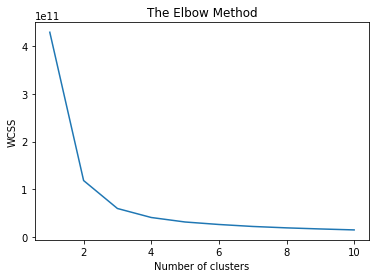

array([2, 1, 2, ..., 0, 0, 2])

In [375]:
#use elbow method to determine the best number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#the result shows that the best number of clusters is 3

In [396]:
#run kmeans algo on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 1, 2, ..., 0, 0, 2])

In [397]:
#add the result as a new column to the dataset
arr=y_kmeans
X['cluster'] = arr.tolist()
X

,income,age,loan,cluster
0,66155.925095,59.017015,8106.532131,2
1,34415.153966,48.117153,6564.745018,1
2,57317.170063,63.108049,8020.953296,2
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,2
...,...,...,...,...
1995,59221.044874,48.518179,1926.729397,2
1996,69516.127573,23.162104,3503.176156,2
1997,44311.449262,28.017167,5522.786693,0
1998,43756.056605,63.971796,1622.722598,0


In [398]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [399]:
#normalize the trainig data 
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [400]:
#excute LR model 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#accuarcy after adding cluster number is 95.7%
#recall is 97.6% (the most important metric because ofthe unblance in data)

[[339   9]
 [  7  45]]
